<a href="https://colab.research.google.com/github/Arslonbekjon/Master-s-code/blob/main/Iqtisodiy_masala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mahsulot narxi (so'm)
price = 500_000

# Mahsulot tannarxi (so'm)
cost_per_unit = 300_000

# Doimiy xarajatlar (oyiga, so'm)
fixed_costs = 50_000_000

# Ishlab chiqarish hajmi (oyiga, dona)
quantity = 2000


#Daromad, xarajat va sof foydani hisoblash.


In [ ]:
# Umumiy daromad
revenue = price * quantity

# Umumiy xarajatlar
total_costs = cost_per_unit * quantity + fixed_costs

# Sof foyda
profit = revenue - total_costs

# Rentabellik (%)
profitability = (profit / total_costs) * 100


#Natijalarni jadval ko'rinishida chiqarish

In [ ]:
results = pd.DataFrame({
    "Ko‘rsatkich": [
        "Umumiy daromad",
        "Umumiy xarajatlar",
        "Sof foyda",
        "Rentabellik (%)"
    ],
    "Qiymat": [
        f"{revenue:,.0f} so'm",
        f"{total_costs:,.0f} so'm",
        f"{profit:,.0f} so'm",
        f"{profitability:.2f} %"
    ]
})

results


,Ko‘rsatkich,Qiymat
0,Umumiy daromad,"1,000,000,000 so'm"
1,Umumiy xarajatlar,"650,000,000 so'm"
2,Sof foyda,"350,000,000 so'm"
3,Rentabellik (%),53.85 %


##Ishlab chiqarish hajmini o‘zgartirib tahlil qilish (1000–10000)

In [ ]:
quantities = np.arange(1000, 10001, 500)
profits = price * quantities - (cost_per_unit * quantities + fixed_costs)
analysis_df = pd.DataFrame({
    "Ishlab chiqarish hajmi (dona)": quantities,
    "Sof foyda": profits
})

analysis_df


,Ishlab chiqarish hajmi (dona),Sof foyda
0,1000,150000000
1,1500,250000000
2,2000,350000000
3,2500,450000000
4,3000,550000000
5,3500,650000000
6,4000,750000000
7,4500,850000000
8,5000,950000000
9,5500,1050000000


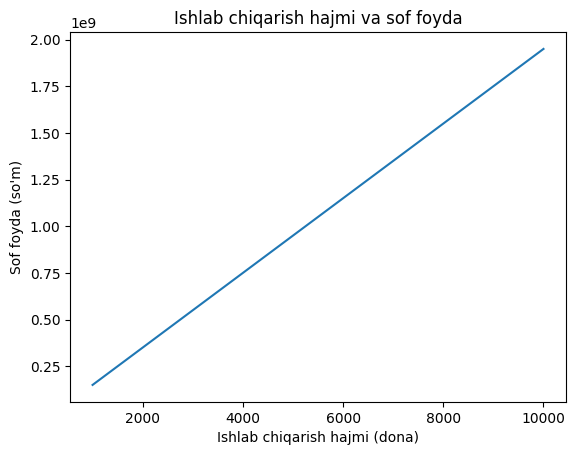

In [ ]:
plt.figure()
plt.plot(analysis_df["Ishlab chiqarish hajmi (dona)"],
         analysis_df["Sof foyda"])
plt.xlabel("Ishlab chiqarish hajmi (dona)")
plt.ylabel("Sof foyda (so'm)")
plt.title("Ishlab chiqarish hajmi va sof foyda")
plt.show()


In [ ]:
max_profit = analysis_df["Sof foyda"].max()
optimal_quantity = analysis_df.loc[
    analysis_df["Sof foyda"].idxmax(),
    "Ishlab chiqarish hajmi (dona)"
]

max_profit, optimal_quantity


(1950000000, np.int64(10000))

##1️⃣ KREDIT TO‘LOVLARINI HISOBLASH (PMT analogi)
📌 Berilganlar:

Kredit: 100 000 000 so‘m

Yillik foiz: 15%

Muddat: 5 yil = 60 oy

In [ ]:
loan_amount = 100_000_000      # Kredit miqdori
annual_rate = 0.15             # Yillik foiz
monthly_rate = annual_rate / 12
months = 60


##Oylik to'lovni hisoblash

In [ ]:
monthly_payment = loan_amount * (
    monthly_rate * (1 + monthly_rate)**months
) / ((1 + monthly_rate)**months - 1)

monthly_payment


2378993.0086358786

##Umumiy to'langan summa va foiz

In [ ]:
total_payment = monthly_payment * months
total_interest = total_payment - loan_amount

total_payment, total_interest


(142739580.5181527, 42739580.518152714)

##Grafik kredit tahlili

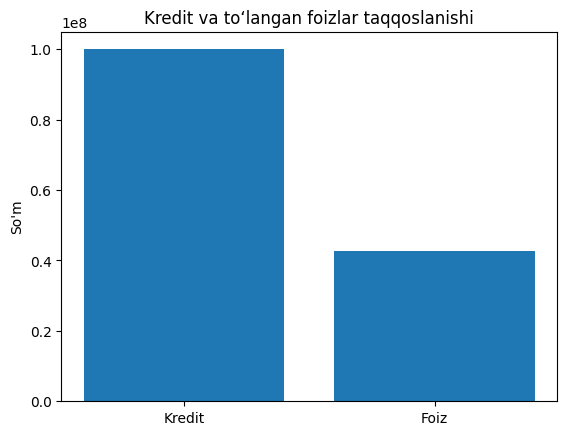

In [ ]:
plt.figure()
plt.bar(["Kredit", "Foiz"], [loan_amount, total_interest])
plt.title("Kredit va to‘langan foizlar taqqoslanishi")
plt.ylabel("So'm")
plt.show()


##2️⃣ NARXNI O‘ZGARTIRIB DAROMADNI MAKSIMALLASHTIRISH
##📌 G‘oya:

Narx → o‘zgaradi
Daromad = Narx × Sotuv hajmi

In [ ]:
prices = np.arange(50_000, 150_001, 10_000)
sales_volume = 3000


##Daromadni hisoblash

In [ ]:
revenues = prices * sales_volume

price_df = pd.DataFrame({
    "Narx (so'm)": prices,
    "Daromad (so'm)": revenues
})

price_df


,Narx (so'm),Daromad (so'm)
0,50000,150000000
1,60000,180000000
2,70000,210000000
3,80000,240000000
4,90000,270000000
5,100000,300000000
6,110000,330000000
7,120000,360000000
8,130000,390000000
9,140000,420000000


##Grafik

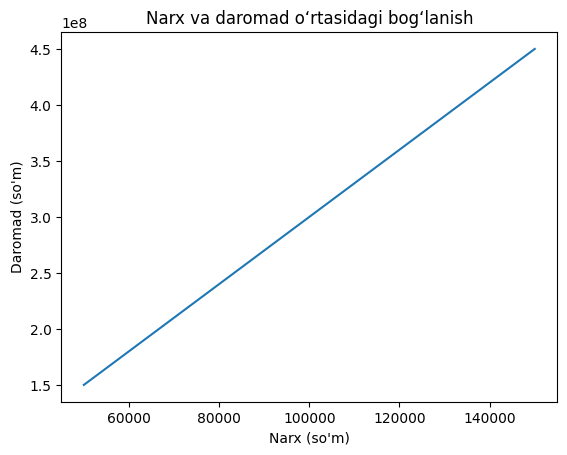

In [ ]:
plt.figure()
plt.plot(prices, revenues)
plt.xlabel("Narx (so'm)")
plt.ylabel("Daromad (so'm)")
plt.title("Narx va daromad o‘rtasidagi bog‘lanish")
plt.show()


##Eng yaxshi narx

In [ ]:
best_price = prices[np.argmax(revenues)]
best_price


np.int64(150000)

3️⃣ INVESTITSIYA RENTABELLIGI (ROI, NPV, IRR)
📌 Berilganlar:

Investitsiya: 200 000 000 so‘m

Yillik foyda: 60 000 000 so‘m

Muddati: 5 yil

## ROI hisoblash

In [ ]:
investment = 200_000_000
annual_profit = 60_000_000
years = 5

total_profit = annual_profit * years

ROI = (total_profit - investment) / investment * 100
ROI

50.0

##NPV va IRR

In [ ]:
!pip install numpy-financial


In [ ]:
import numpy_financial as npf


In [ ]:
cash_flows = [-investment] + [annual_profit] * years
discount_rate = 0.15

NPV = npf.npv(discount_rate, cash_flows)
IRR = npf.irr(cash_flows)

NPV, IRR


(np.float64(1129305.8806841373), 0.1523823711663066)

##Grafik

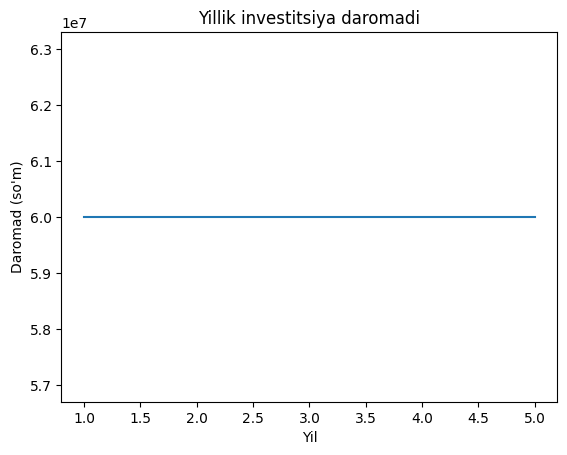

In [ ]:
plt.figure()
plt.plot(range(1, years+1), [annual_profit]*years)
plt.xlabel("Yil")
plt.ylabel("Daromad (so'm)")
plt.title("Yillik investitsiya daromadi")
plt.show()


#4️⃣ BUDJET TAHLILI VA OPTIMALLASHTIRISH

In [ ]:
data = {
    "Xarajat turi": ["Ijara", "Reklama", "Oylik", "Ta'minot"],
    "Budjet (so'm)": [20_000_000, 10_000_000, 40_000_000, 15_000_000],
    "Fakt (so'm)": [22_000_000, 8_000_000, 42_000_000, 18_000_000]
}

budget_df = pd.DataFrame(data)


##Farqni hisoblash

In [ ]:
budget_df["Farq (%)"] = (
    (budget_df["Fakt (so'm)"] - budget_df["Budjet (so'm)"])
    / budget_df["Budjet (so'm)"]
) * 100

budget_df

,Xarajat turi,Budjet (so'm),Fakt (so'm),Farq (%)
0,Ijara,20000000,22000000,10.00
1,Reklama,10000000,8000000,-20.00
2,Oylik,40000000,42000000,5.00
3,Ta'minot,15000000,18000000,20.00


##Grafik

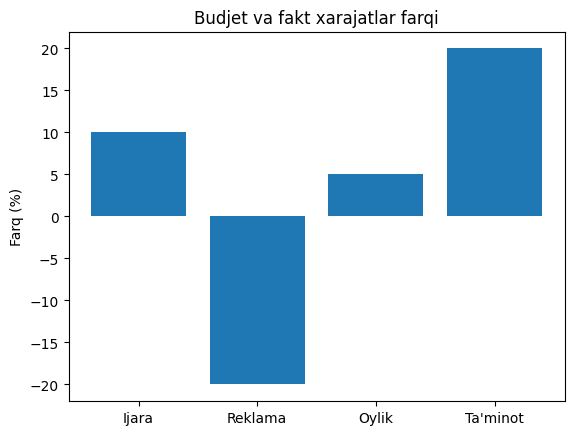

In [ ]:
plt.figure()
plt.bar(budget_df["Xarajat turi"], budget_df["Farq (%)"])
plt.ylabel("Farq (%)")
plt.title("Budjet va fakt xarajatlar farqi")
plt.show()
